In [150]:
def quantumRandomNumberGenerator(number_of_qubits):
    # define qubits
    qubits = cirq.NamedQubit.range(number_of_qubits,prefix='Qorpi_Qubit_')
    
    #define Hadamard gates and measurement gates
    H_gates =[cirq.H(q) for q in qubits]
    measure_gates = cirq.measure(qubits,key='Qorpi_QRNG_Measurement')
    
    #define circuit and add gates to circuit
    c_qrng = cirq.Circuit(H_gates,measure_gates)
    
    #define simulator for simulate circuit
    result = cirq.Simulator().simulate(c_qrng)
    
    output = [i for i in result.measurements['Qorpi_QRNG_Measurement']]
    return output,c_qrng

r,c=quantumRandomNumberGenerator(10)
r

[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [296]:
def CreateRandomNumber(a,b):
    r,_=quantumRandomNumberGenerator(b-a)
    
    if a==0:
        pass
    else :
        for i in range(a):
            r.append(1)
    c = 0
    for i in r:
        c+=i
    return c

CreateRandomNumber(4,10)

7

In [310]:
from tqdm import tqdm
qrng = []
for i in tqdm(range(100)):
    qrng.append(CreateRandomNumber(1,25))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:23<00:00,  1.20it/s]


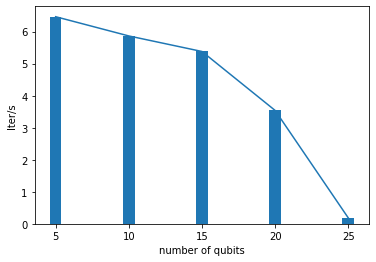

In [320]:
import matplotlib.pyplot as plt
import numpy as np
iterPerSecond=[642.61,352.50,217.03,34.42,1.20]
plt.bar(np.arange(5,26,5),np.log(iterPerSecond))
plt.plot(np.arange(5,26,5),np.log(iterPerSecond))
plt.xlabel('number of qubits')
plt.ylabel('Iter/s')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:25<00:00, 385.23it/s]


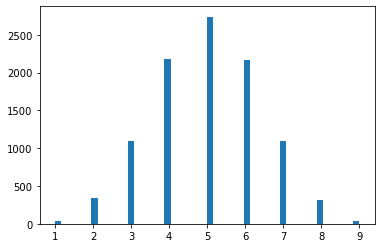

In [334]:
from tqdm import tqdm
qrng = []
for i in tqdm(range(10000)):
    qrng.append(CreateRandomNumber(1,9))

plt.hist(qrng,bins=50)
plt.show()

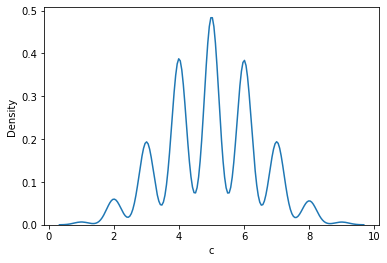

In [364]:
import pandas as pd
from seaborn import kdeplot
count,vision = np.histogram(qrng,bins=50)
s={'a':np.linspace(1,9,len(qrng)),'c':qrng}
df=pd.DataFrame(s,columns=s.keys())
kdeplot(data=df,x='c')
plt.show()

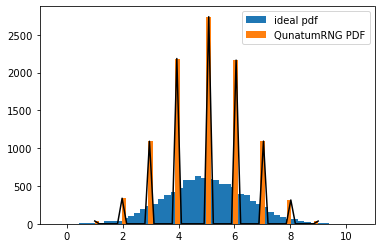

In [356]:
from scipy.stats import norm
ideal=norm.rvs(size=len(qrng),loc=np.mean(qrng),scale=np.std(qrng))
plt.hist(ideal,bins=50,label='ideal pdf')
plt.hist(qrng,bins=50,label='QunatumRNG PDF')
plt.plot(np.linspace(1,9,len(count)),count,color='black')
plt.legend()
plt.show()